### Homework 3.5 - Noise Reduction

We will try to reduce audio noise using the Fourier trick I shown in the lecture.

In this problem, you will have to make a short record of about 5-10 seconds with a auditable background noise. The source of noise can be fan, air condition, etc. Make sure the noise is constant throughout the audio so that we can easily pick up the noise in the frequency domain.

Be careful the copyrighted materials.

**You must show all the steps clearly. Write your explanation in the markdown boxes.**

In [1]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc, fftpack

1. Read .wav file with y as the signal and freq as the sampling rate, later create t as the time data points. The signal is on time domain now.


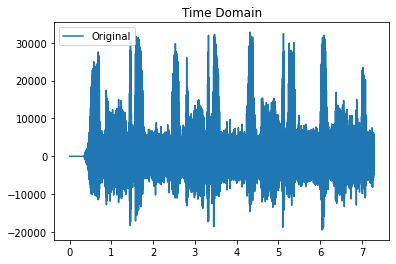

In [9]:
freq, y = wavfile.read('images/Voice 003.wav')

dt = 1/freq
t = np.linspace(0, (len(y)-1)*dt, len(y))
plt.plot(t, y, label='Original')
plt.title('Time Domain')
plt.legend()


2. use .rfft to apply Fast Fourier Transform on y.
3. use .rfftfreq to obtain sample frequencies

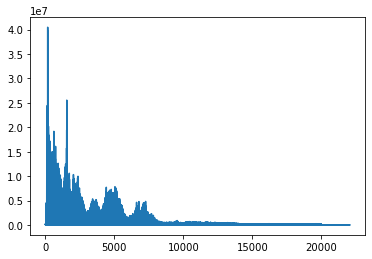

In [3]:
n = len(t)
yf = fftpack.rfft(y)
xf = fftpack.rfftfreq(n, dt)

plt.plot(xf, np.abs(yf))

5. Find the noticable peaks on the x axis (frequency) and create masks around it

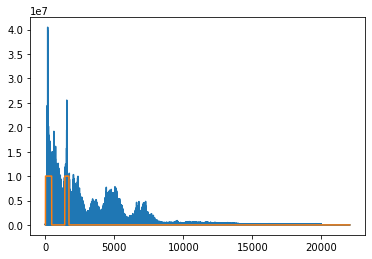

In [10]:
mask1 = np.where(np.logical_and(xf > 0, xf < 450), 1, 0)
mask2 = np.where(np.logical_and(xf > 1400, xf < 1700), 1, 0)
mask = np.logical_or(mask1, mask2)


plt.plot(xf, np.abs(yf))
plt.plot(xf, mask * 1e7)

6. Multiply the frequency data points with the mask to clean the data.

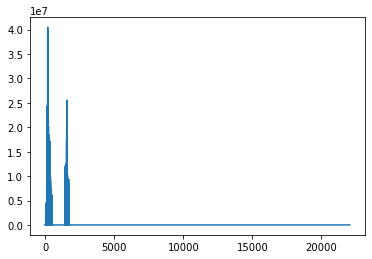

In [5]:
yf_clean = yf * mask
plt.plot(xf, np.abs(yf_clean))

7. Use .irfft to reverse the effects on Fast Fourier Transform on the cleaned data. This results in the data back on the time domain.

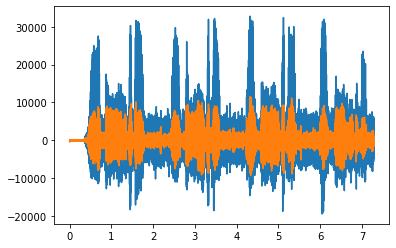

In [6]:
new_f_clean = fftpack.irfft(yf_clean)
plt.plot(t, y)
plt.plot(t, new_f_clean)

8. Write the cleaned data into new file

In [7]:
wavfile.write("images/Voice 003 Clean.wav", freq, np.array(new_f_clean, dtype=np.int16))